In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import pickle
import datetime
import torch
import glob

from Config import config
from utils import utils, dataset_utils

# Files

## Unlabelled datasets

In [2]:
filenames = glob.glob('./data/Unlabelled Data/datasetInfo*')
for filename in filenames:
    print(filename.split('/')[-1])

datasetInfo_AIS_Custom_01062021_30112021_CarFisHigMilPasPleSaiTan_3000_43200_600.pkl
datasetInfo_AIS_Custom_01062021_30112021_CarFisHigMilPasPleSaiTan_600_43200_120.pkl
datasetInfo_AIS_Custom_01112021_30112021_CarDivFisHigMilOthPasPilPleSaiTan_600_43200_120.pkl
datasetInfo_AIS_Custom_01062021_30112021_CarDivFisHigMilOthPasPilPleSaiTan_600_43200_120.pkl
datasetInfo_AIS_Custom_01122021_31122021_CarFisHigMilPasPleSaiTan_600_43200_120.pkl
datasetInfo_AIS_Custom_01062021_30112021_CarFisHigMilPasPleSaiTan_600_43200_0.pkl


## Labelled datasets

In [3]:
filenames = glob.glob('./data/Labelled Data/datasetInfo*')
for filename in filenames:
    print(filename.split('/')[-1])

datasetInfo_AIS_Custom_13122021_13122021_CarFisHigMilPasPleSaiTan_600_43200_0.pkl
datasetInfo_AIS_Custom_13122021_13122021_CarFisHigMilPasPleSaiTan_600_43200_120.pkl
datasetInfo_AIS_Custom_13122021_13122021_CarFisHigMilPasPleSaiTan_3000_43200_600.pkl


# Keys

In [4]:
filename = './data/Labelled Data/datasetInfo_AIS_Custom_13122021_13122021_CarFisHigMilPasPleSaiTan_600_43200_120.pkl'
with open(filename,'rb') as file:
    data = pickle.load(file)
    
print(data.keys())

dict_keys(['indicies', 'dataFileName', 'ROI', 'timeperiod', 'maxspeed', 'navstatuses', 'shiptypes', 'binedges', 'minTrackLength', 'maxTrackLength', 'resampleFrequency', 'testIndicies', 'trainIndicies', 'outlierLabels', 'mean', 'std', 'max', 'min', 'train_mean', 'train_std', 'train_max', 'train_min', 'test_mean', 'test_std', 'test_max', 'test_min'])


## dataFileName

The key 'dataFileName' denote the relative path of the binary data file holding the trajectory data. Value is of type string.

In [5]:
data['dataFileName']

'./data/Labelled Data/data_AIS_Custom_13122021_13122021_CarFisHigMilPasPleSaiTan_600_43200_120.pkl'

## indicies

The key 'indicies' denote the beginning of each trajectory position in the binary data. 'trainIndicies' and 'testIndicies' denote a random 80-20 split of the indicies into training and test set. The values are of type: [ints].

In [6]:
data['indicies']

[0,
 5818,
 10736,
 15249,
 22957,
 37146,
 43504,
 52247,
 55185,
 58438,
 64436,
 70434,
 73147,
 75050,
 76953,
 78361,
 79229,
 81492,
 87760,
 92948,
 106822,
 118626,
 121474,
 123107,
 129600,
 141854,
 143982,
 145570,
 146393,
 147036,
 159425,
 163893,
 164941,
 173054,
 173607,
 174790,
 176198,
 182016,
 195305,
 198423,
 213332,
 214470,
 216373,
 232047,
 247721,
 253944,
 259762,
 265625,
 269193,
 277216,
 278894,
 280167,
 285445,
 293378,
 294651,
 308210,
 309258,
 318316,
 326339,
 327612,
 340136,
 341544,
 345247,
 353045,
 363093,
 364546,
 365909,
 368532,
 369400,
 385074,
 400748,
 416422,
 432051,
 447725,
 463354,
 479028,
 494702,
 510376,
 526050,
 538169,
 553843,
 569472,
 585146,
 600820,
 616494,
 632123,
 647752,
 663381,
 679055,
 694729,
 701492,
 709785,
 719698,
 729611,
 741009,
 756683,
 772312,
 782495,
 793713,
 804886,
 808049,
 813642,
 829316,
 844990,
 847973,
 848976,
 852229,
 852737,
 859545,
 875174,
 890758,
 906432,
 922061,
 933189,

## Region of Interest

The key 'ROI' hold the minimum and maximum latitude/longitude values of the Regoin of Interest. Value is of type tuple, (lat_min, lat_max, lon_min, lon_max).    
The key 'binedges' hold edges for a binning of features latitude, longitude, speed, and course using the resolution 0.01, 0.01, 0.5, 5 respectively. This is used for the 4-hot-encoding suggested in GeoTrackNet. The value is of type tuple, (numpy-array(lats), numpy-array(lons), numpy-array(speeds), numpy-array(courses)).

In [7]:
print(data['ROI'])
print(data['binedges'])

(54.5, 56, 13, 16)
(array([54.5 , 54.51, 54.52, 54.53, 54.54, 54.55, 54.56, 54.57, 54.58,
       54.59, 54.6 , 54.61, 54.62, 54.63, 54.64, 54.65, 54.66, 54.67,
       54.68, 54.69, 54.7 , 54.71, 54.72, 54.73, 54.74, 54.75, 54.76,
       54.77, 54.78, 54.79, 54.8 , 54.81, 54.82, 54.83, 54.84, 54.85,
       54.86, 54.87, 54.88, 54.89, 54.9 , 54.91, 54.92, 54.93, 54.94,
       54.95, 54.96, 54.97, 54.98, 54.99, 55.  , 55.01, 55.02, 55.03,
       55.04, 55.05, 55.06, 55.07, 55.08, 55.09, 55.1 , 55.11, 55.12,
       55.13, 55.14, 55.15, 55.16, 55.17, 55.18, 55.19, 55.2 , 55.21,
       55.22, 55.23, 55.24, 55.25, 55.26, 55.27, 55.28, 55.29, 55.3 ,
       55.31, 55.32, 55.33, 55.34, 55.35, 55.36, 55.37, 55.38, 55.39,
       55.4 , 55.41, 55.42, 55.43, 55.44, 55.45, 55.46, 55.47, 55.48,
       55.49, 55.5 , 55.51, 55.52, 55.53, 55.54, 55.55, 55.56, 55.57,
       55.58, 55.59, 55.6 , 55.61, 55.62, 55.63, 55.64, 55.65, 55.66,
       55.67, 55.68, 55.69, 55.7 , 55.71, 55.72, 55.73, 55.74, 55.75,


## Timeperiod

The key 'timeperiod' hold the time period of the trajectories. The time is in Unix epoch-time. The value is of type tuple, (startTime, endTime).

In [8]:
print(data['timeperiod'])
print((datetime.datetime.fromtimestamp(data['timeperiod'][0]),datetime.datetime.fromtimestamp(data['timeperiod'][1])))

(1639350000.0, 1639436399.000999)
(datetime.datetime(2021, 12, 13, 0, 0), datetime.datetime(2021, 12, 13, 23, 59, 59, 999))


## Ship types
The key 'shiptypes' contain the ship types included in the data set in AIS index encoding format. The AIS index encoding format can be translated using the function 'convertShipTypeToName' in 'dataset_utils'. Value is of type [int].

In [9]:
print(data['shiptypes'])
print([dataset_utils.convertShipTypeToName(st) for st in data['shiptypes']])

[70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 30, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 36, 37, 35, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
['Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Cargo', 'Fishing', 'Passenger', 'Passenger', 'Passenger', 'Passenger', 'Passenger', 'Passenger', 'Passenger', 'Passenger', 'Passenger', 'Passenger', 'Tanker', 'Tanker', 'Tanker', 'Tanker', 'Tanker', 'Tanker', 'Tanker', 'Tanker', 'Tanker', 'Tanker', 'Sailing', 'Pleasure', 'Military', 'High Speed Vessel', 'High Speed Vessel', 'High Speed Vessel', 'High Speed Vessel', 'High Speed Vessel', 'High Speed Vessel', 'High Speed Vessel', 'High Speed Vessel', 'High Speed Vessel', 'High Speed Vessel']


## Navigational Status
The key 'navstatuses' contain the AIS navigational status used to create the data set in AIS index encoding format. Read more about the AIS Navigational Status here; https://help.marinetraffic.com/hc/en-us/articles/203990998-What-is-the-significance-of-the-AIS-Navigational-Status-Values-. Value is of type [int].

In [10]:
data['navstatuses']

[0, 2, 3, 4, 7, 8, 9, 10, 11, 12, 13, 14, 15, 96, 97, 99]

## Trajectory Parameters
Preprocessing parameters used to create the dataset. Parameters are; Maximum speed ('maxspeed') in m/s, minimum trajectory duration ('minTrackLength') in seconds, maximum trajectory duration ('maxTrackLength') in seconds, and resample period ('resampleFrequency') in seconds. Values are of type int

In [11]:
print(data['maxspeed'])
print(data['minTrackLength'])
print(data['maxTrackLength'])
print(data['resampleFrequency'])

20
600
43200
120


## Outlier Labels
The key 'outlierLabels' hold the manual annotated outlier label of the trajectories. This key is only present in labelled datasets. 0 denote normal behaviour and 1 denote abnormal behaviour. The value is of type numpy.array(int).

In [12]:
data['outlierLabels']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

## Feature Statistics
Basic statistics of latitude, longitude, speed, and course features. Statistics are avaliable for both the total dataset and train and test indicies. Statistic are; Mean ('mean', 'train_mean', 'test_mean'), standard deviation ('std', 'train_std', 'test_std'), minimum ('min', 'train_min', 'test_min'), maximum ('max', 'train_max', 'test_ax') in seconds. Values are of type numpy.array() of shape 4

In [13]:
print(data['mean'])
print(data['std'])
print(data['max'])
print(data['min'])

[55.1985744466839, 14.488265797535794, 3.720059461730637, 160.41013616784483]
[0.2909405874371958, 0.6906304433575519, 3.3089420520065658, 103.26118226918905]
[55.999433333333336, 15.9998, 19.561046981811522, 359.8999938964844]
[54.50005, 13.0, 0.0, 0.0]


# Read Single Trajectory

The function 'readTrajectory' in 'dataset_utils' may be used to read a single trajectory. Inputs are:   
* the filename of the dataset-Info file    
* the index of the trajectory.   

The return value is a pandas Dataframe with columns:   
* mmsi. The MMSI of the parent vessel. Type int
* shiptype. The Ship type in AIS ship type index encoding. Type; int
* track_length. The length of the trajectory. Type; int
* lat. The latitude of each trajectory point. Type; float
* lon. The longitude of each trajectory point. Type; float
* speed. The speed in m/s of each trajectory point. Type; float
* course. The course in degrees of each trajectory point. Type; float
* timestamp. The timestamp in Unix epoch-time of each trajectory point. Type; int


In [14]:
filename = './data/Labelled Data/datasetInfo_AIS_Custom_13122021_13122021_CarFisHigMilPasPleSaiTan_600_43200_120.pkl'
dataset_utils.readTrajectory(filename, 0)

,mmsi,shiptype,track_length,lat,lon,speed,course,timestamp
0,209183000,60,126,54.506400,13.833317,7.673796,332.000000,1.639369e+09
1,209183000,60,126,54.514338,13.826137,7.697374,332.000000,1.639369e+09
2,209183000,60,126,54.522275,13.818958,7.720953,332.000000,1.639369e+09
3,209183000,60,126,54.530213,13.811779,7.744532,332.000000,1.639369e+09
4,209183000,60,126,54.538150,13.804600,7.768110,332.000000,1.639370e+09
...,...,...,...,...,...,...,...,...
121,209183000,60,126,55.370225,13.154733,0.668778,117.083333,1.639384e+09
122,209183000,60,126,55.370408,13.154700,0.189949,80.846154,1.639384e+09
123,209183000,60,126,55.370700,13.154800,0.094315,128.750000,1.639384e+09
124,209183000,60,126,55.370700,13.154800,0.000000,182.818182,1.639384e+09


# Read Entire Dataset

The function 'readDataset' in 'dataset_utils' may be used to read all trajectories into memory. Inputs are:   
* the filename of the dataset-Info file    

The return values are:   
* data. List of all trajectories as numpy arrays. Type [np.array of shapes; lengths X 4]
* params. The dataset infomation as described in Section "Keys". Type; dict
* mmsis. The MMSI of each parent vessel. Type; np.array(int)
* shiptypes. The ship type in AIS ship type index encoding of each trajectory. Type; np.array(int)
* lengths. The length of each trajectory. Type; np.array(int)

In [15]:
filename = './data/Labelled Data/datasetInfo_AIS_Custom_13122021_13122021_CarFisHigMilPasPleSaiTan_600_43200_120.pkl'

data, params, mmsis, shiptypes, lengths = dataset_utils.readDataset(filename)

# Usage with PyTorch
We provide the Class 'AISDataset' in 'dataset_utils' as a basic dataset class usable with PyTorch. This class can be freely extended as needed. Ship types are labelled according to the index in the function 'dataset_utils.classNames'

In [16]:
def PadSequence(batch):         
    # each element in "batch" is a tuple ( mmsis,  timestamps, labels, lengths, inputs, targets)
    # Get each sequence and pad it
    mmsis = [x[0] for x in batch]
    timestamps = [x[1] for x in batch]
    labels = [x[2] for x in batch]
    lengths = [x[3] for x in batch]
    inputs = [x[4] for x in batch]
    targets = [x[5] for x in batch]
                
    inputs_padded = torch.nn.utils.rnn.pad_sequence(inputs, batch_first=True)
    targets_padded = torch.nn.utils.rnn.pad_sequence(targets, batch_first=True)

    return  torch.tensor(mmsis), timestamps, torch.tensor(labels), torch.tensor(lengths, dtype=torch.long), inputs_padded, targets_padded

trainset = dataset_utils.AISDataset('data/Unlabelled Data/datasetInfo_AIS_Custom_01062021_30112021_CarFisHigMilPasPleSaiTan_600_43200_120.pkl', combined=True)
testset = dataset_utils.AISDataset('data/Labelled Data/datasetInfo_AIS_Custom_13122021_13122021_CarFisHigMilPasPleSaiTan_600_43200_120.pkl', combined=True, train_preproc = (trainset.mean, trainset.std))
             
train_n = len(trainset)
test_n = len(testset)

classnames, nClasses = dataset_utils.classNames()
train_classnames = [classnames[x] for x in torch.unique(trainset.labels)]
test_classnames = [classnames[x] for x in torch.unique(testset.labels)]

#Check whether to zero pad to same length
batch_size = 32
if trainset.params['minTrackLength']==trainset.params['maxTrackLength']:
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers = 1)
    test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, pin_memory=True, num_workers = 1)
else:
    train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, pin_memory=True, num_workers = 1, collate_fn=PadSequence)
    test_loader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, pin_memory=True, num_workers = 1, collate_fn=PadSequence)

In [17]:
print(train_n)
print(test_n)
print(testset.outliers)

106728
521
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0

In [18]:
for i, (mmsis, timestamps, labels, lengths, inputs, targets) in enumerate(train_loader):
    print(inputs)
    print(targets)
    break

tensor([[[-1.1268, -1.9151, -0.4711,  0.7923],
         [-1.1343, -1.9169, -0.4157,  0.8189],
         [-1.1400, -1.9179, -0.4355,  0.8284],
         ...,
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000]],

        [[-0.1426,  1.1412, -1.1985,  1.7377],
         [-0.1426,  1.1412, -1.1985,  1.7377],
         [-0.1426,  1.1411, -1.1985,  1.7377],
         ...,
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000]],

        [[-1.8541,  1.5050, -1.1985, -1.6059],
         [-1.8541,  1.5050, -1.1985, -1.6059],
         [-1.8541,  1.5050, -1.1985, -1.6059],
         ...,
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  0.0000]],

        ...,

        [[ 0.8944, -0.4288, -1.1985,  0.8352],
         [ 0.8944, -0.4288, -1.1985,  0.8352]

# Plot Trajectory
We provide utility functions for plotting trajectories on a background from Google maps. The background may or may not also contain historic trajectories in grey. Function 'plotMapBackground' plot the background and 'plotTrack' plot a track. 'plotTrack' han functionality to also plot the speed of the trajectory on a seperate axis insert.

<AxesSubplot:>

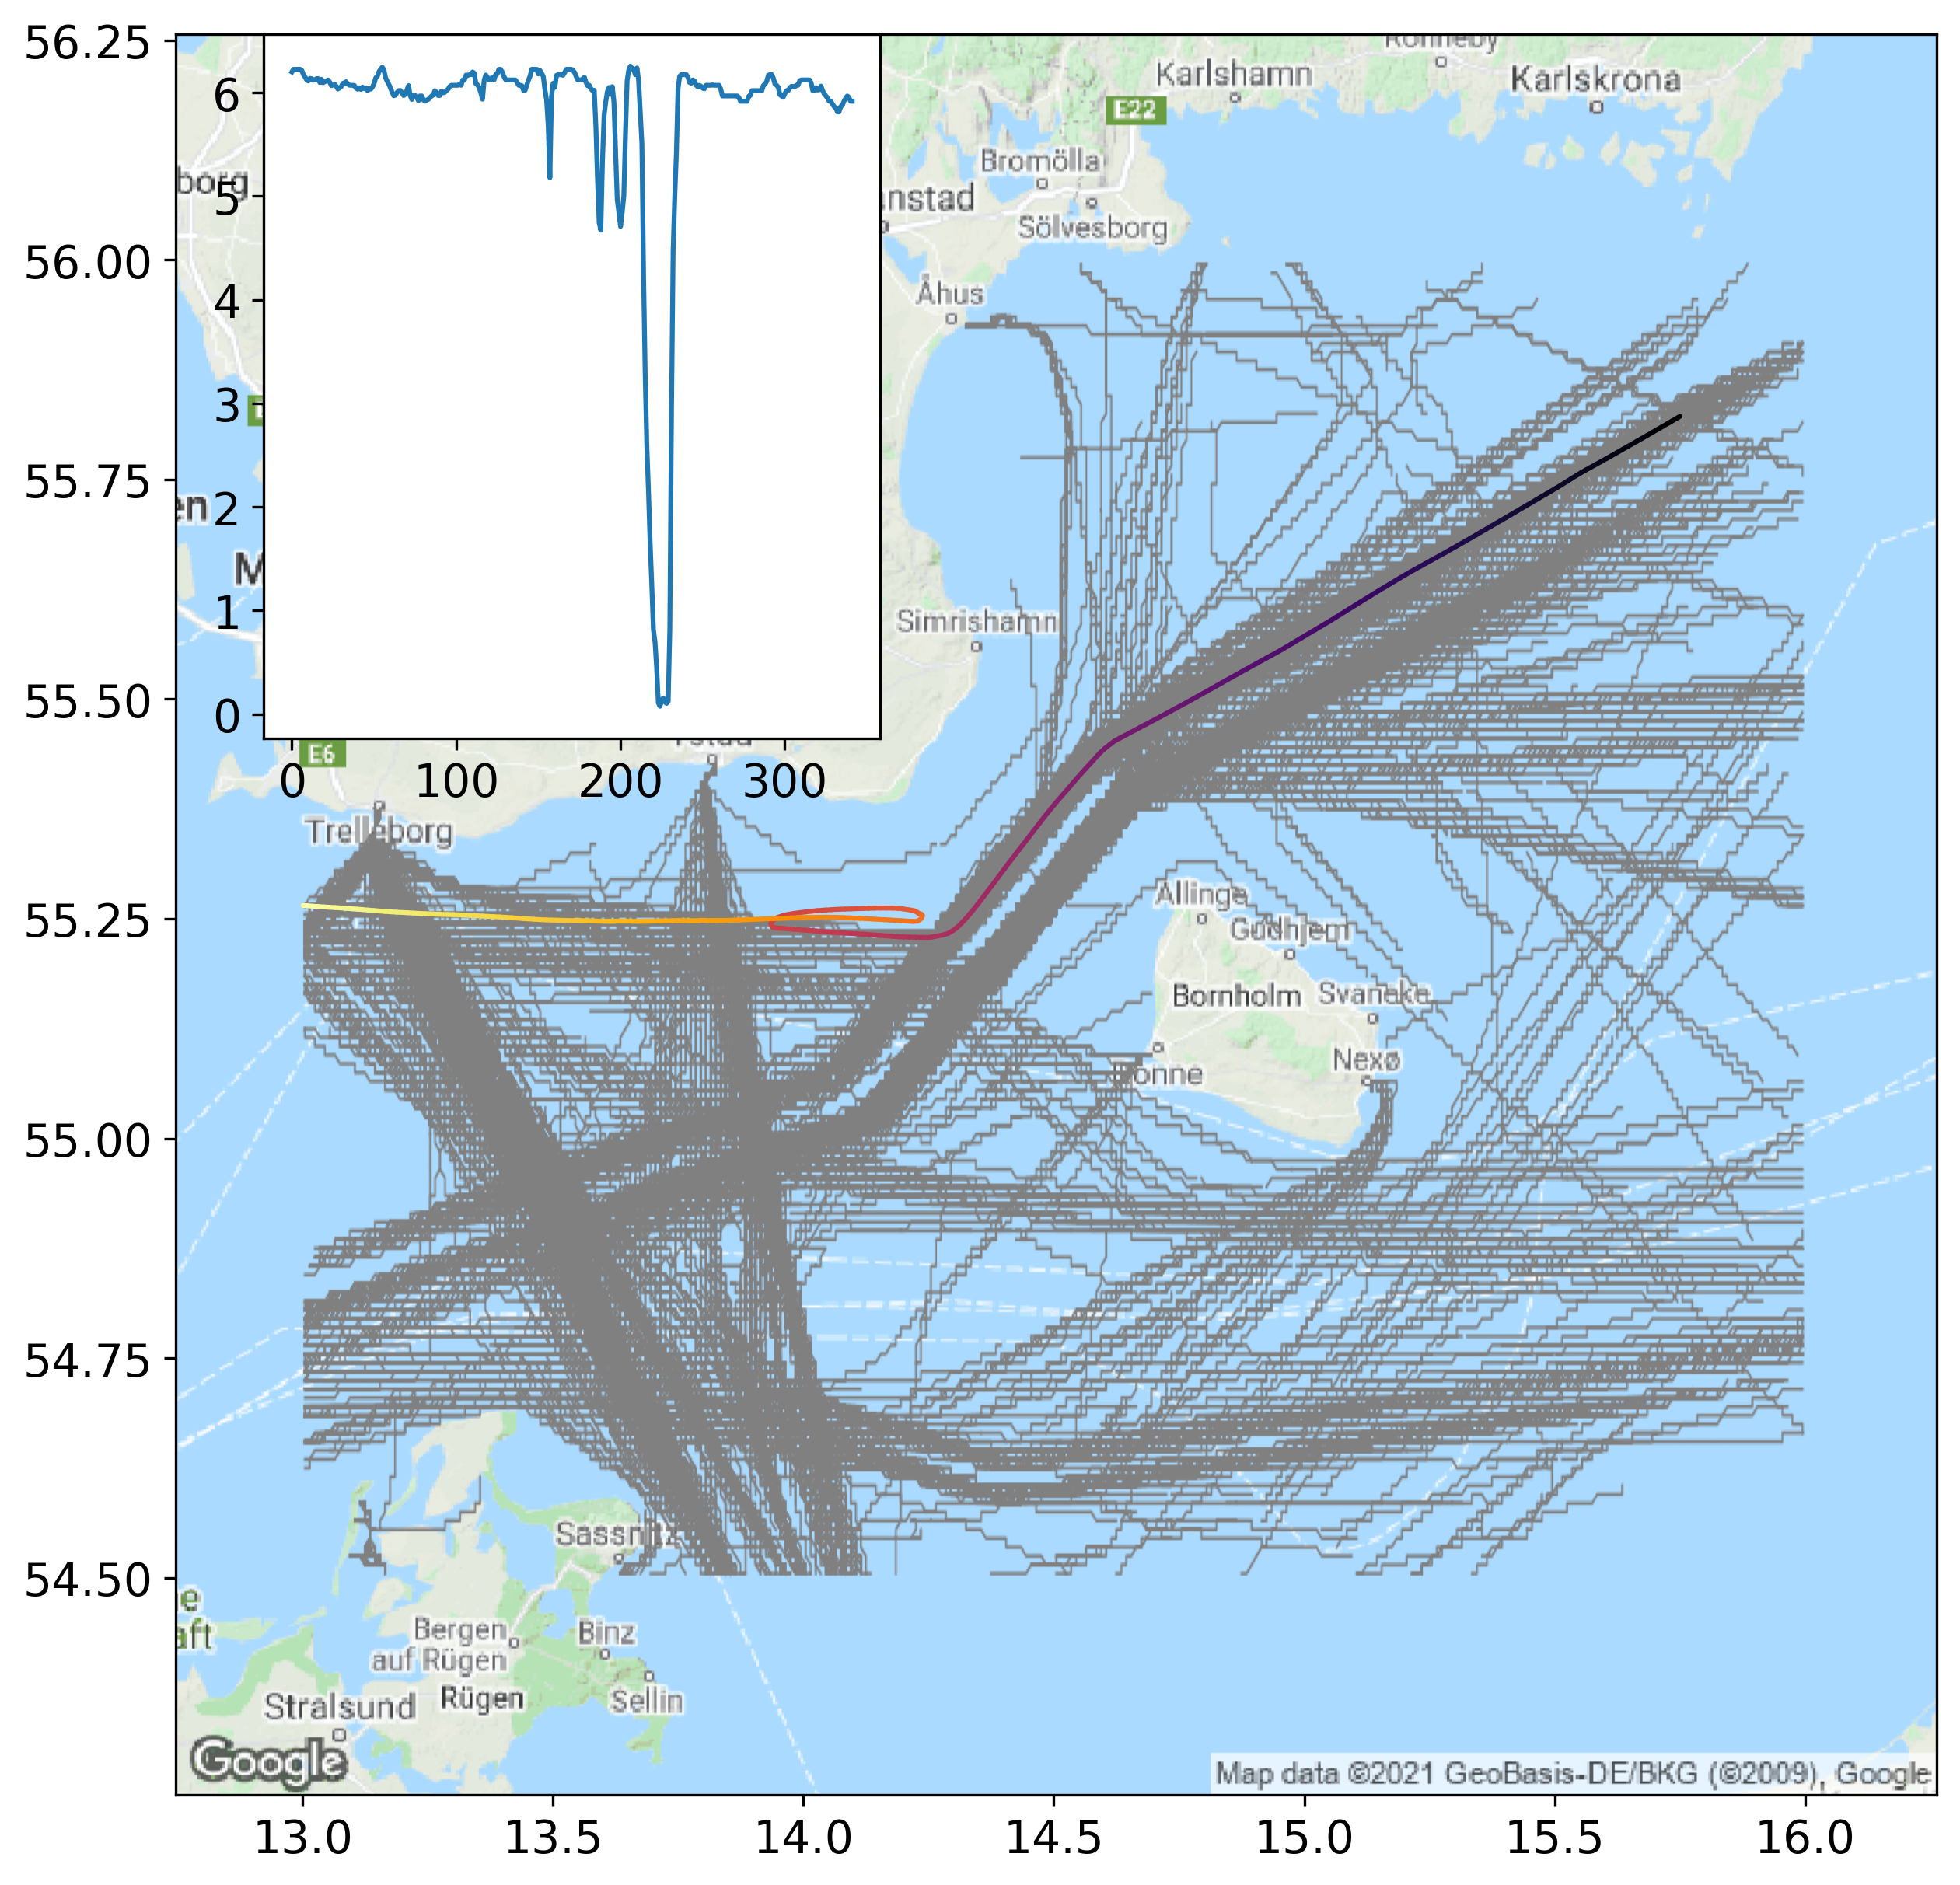

In [19]:
filename = './data/Labelled Data/datasetInfo_AIS_Custom_13122021_13122021_CarFisHigMilPasPleSaiTan_600_43200_120.pkl'

data, params, mmsis, shiptypes, lengths = dataset_utils.readDataset(filename)

fig, ax = plt.subplots(1,1,figsize=(10,10))
utils.plotMapBackground(ax, params['binedges'])
utils.plotTrack(data[211], data[211][:,2], ax, color=None, lsty='solid', insertSpeed=True)